In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [34]:
banking = pd.read_csv("C:\\Users\\Bruger\\Downloads\\banking.csv")

In [35]:
print(banking)

       age          job  marital            education  default housing loan  \
0       44  blue-collar  married             basic.4y  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married             basic.4y       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married             basic.4y  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  

In [36]:
X = banking.drop(columns=['y'])
y = banking['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Розмір тренувального датасету:", X_train.shape)
print("Розмір тестового датасету:", X_test.shape)

Розмір тренувального датасету: (28831, 20)
Розмір тестового датасету: (12357, 20)


In [37]:
encoder = LabelEncoder()
categorical_features = features.select_dtypes(include=['object']).columns
for column in categorical_features:
    features[column] = encoder.fit_transform(features[column])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [38]:
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

equation = f"y = {intercept:.2f}"

for feature, coefficient in zip(features.columns, coefficients):
    equation += f" + {coefficient:.2f} * {feature}"

print("Equation: ", equation)

Equation:  y = 0.00 + 0.00 * age + 0.01 * job + 0.10 * marital + 0.04 * education + -0.49 * default + -0.01 * housing + -0.04 * loan + -0.83 * contact + -0.10 * month + 0.08 * day_of_week + 0.00 * duration + -0.05 * campaign + -0.00 * pdays + -0.11 * previous + 0.47 * poutcome + -0.67 * emp_var_rate + 0.58 * cons_price_idx + 0.03 * cons_conf_idx + 0.36 * euribor3m + -0.01 * nr_employed


In [45]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

auc_roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC-ROC Score:", auc_roc)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

Confusion Matrix:
 [[10600   331]
 [  831   595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10931
           1       0.64      0.42      0.51      1426

    accuracy                           0.91     12357
   macro avg       0.78      0.69      0.73     12357
weighted avg       0.89      0.91      0.90     12357

AUC-ROC Score: 0.9232594152046184


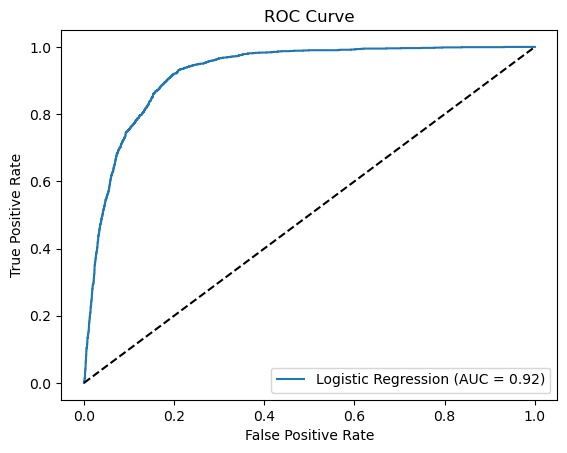

In [40]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [47]:
# Модель має високу точність у визначенні тих клієнтів, які не відкриють вклад (true negatives).
# Модель має помірну точність у визначенні клієнтів, які відкривають вклад (true positives), а також помилково класифікує деяких клієнтів як тих, що відкривають вклад (false positives).
# Модель помилково пропускає деяких клієнтів, які справді відкривають вклад (false negatives).

# Загалом, модель показує добрі результати для класу 0, але виявляється менш ефективною для класу 1. Варто провести подальшу настройку моделі або використовувати інші алгоритми для покращення прогнозування класу 1.

# AUC-ROC Score дорівнює 0.9233. Це значення AUC-ROC свідчить про те, що модель має добру здатність правильно впорядковувати позитивні та негативні приклади. Модель має досить високу якість у впорядкуванні прикладів.

# Модель може бути корисною для прогнозування клієнтів, які не відкриють вклад у банку, з високою точністю та чутливістю. 